In [23]:
import yfinance as yf
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import statsmodels.api as sm
from pandas.plotting import lag_plot

[*********************100%***********************]  1 of 1 completed


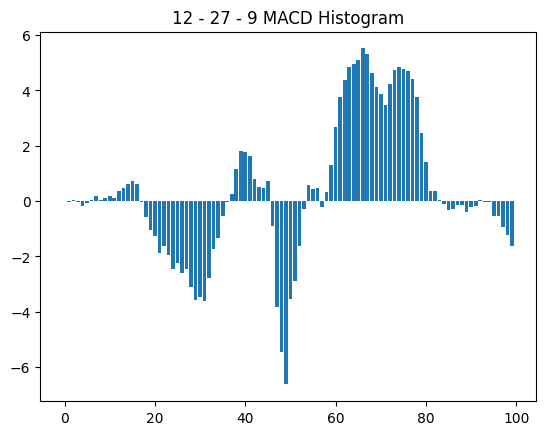

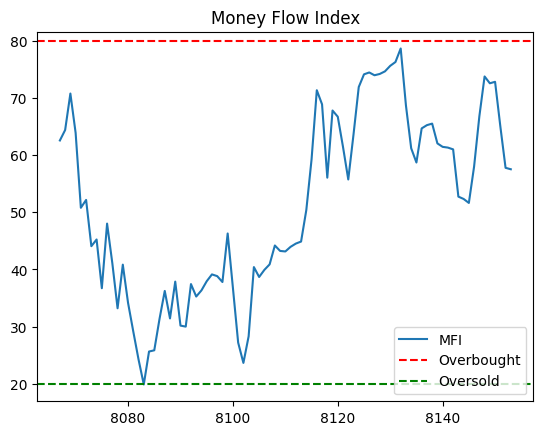

68
23
                            OLS Regression Results                            
Dep. Variable:      3 Period % Change   R-squared:                       0.028
Model:                            OLS   Adj. R-squared:                 -0.074
Method:                 Least Squares   F-statistic:                    0.2776
Date:                Mon, 23 Jun 2025   Prob (F-statistic):              0.761
Time:                        09:07:41   Log-Likelihood:                 44.843
No. Observations:                  22   AIC:                            -83.69
Df Residuals:                      19   BIC:                            -80.41
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0156      0.032     -0.482   

Price,Adj Close,Close,High,Low,Open,Volume,12_ema,27_ema,MACD,Signal,...,MFI,BB_SMA,BB_STD,Upper_Band,Lower_Band,BB,Close + 3,3 Period % Change,Predictions,Residuals
0,559.468079,562.809998,563.830017,551.489990,556.109985,62660300,570.367352,581.043388,-10.676035,-7.909620,...,31.344539,584.578998,19.755408,624.089813,545.068182,0.775482,567.130005,0.007676,0.004707,-0.002969
1,563.762451,567.130005,570.950012,561.630005,562.830017,66556000,568.293026,577.628852,-9.335826,-8.808600,...,37.868658,577.638000,16.945600,611.529201,543.746800,0.655025,574.080017,0.012255,0.001162,-0.011093
2,572.387878,574.080017,575.150024,570.200012,570.799988,58766800,568.313146,575.610303,-7.297157,-8.456682,...,37.440317,572.438998,13.198114,598.835227,546.042770,0.468916,567.080017,-0.012193,-0.003671,0.008522
3,565.408508,567.080017,570.900024,564.940002,567.179993,42164200,568.947276,574.475631,-5.528355,-7.152816,...,37.933095,569.304004,10.369329,590.042661,548.565347,0.553619,560.969971,-0.010775,-0.004756,0.006018
4,559.316467,560.969971,562.940002,553.679993,557.450012,54609600,565.010119,571.236139,-6.226020,-6.707420,...,37.798902,565.364502,7.951407,581.267316,549.461688,0.638168,505.279999,-0.099274,-0.001653,0.097621
5,503.790649,505.279999,525.869995,505.059998,523.669983,217965100,552.077287,563.602996,-11.525709,-7.705218,...,27.206411,559.105003,15.168621,589.442246,528.767761,1.387111,548.619995,0.085774,0.005944,-0.079830
6,547.002930,548.619995,548.619995,493.049988,493.440002,241867300,539.051417,554.218993,-15.167576,-11.613142,...,40.409429,552.810504,23.612569,600.035643,505.585365,0.544367,539.119995,-0.017316,0.010553,0.027869
7,537.530884,539.119995,544.280029,533.859985,544.049988,68034000,536.802277,549.890899,-13.088622,-12.810119,...,40.881772,548.623505,24.361139,597.345783,499.901226,0.597527,526.409973,-0.023575,0.001694,0.025269
8,524.858337,526.409973,531.169983,523.909973,527.640015,79741000,533.841736,545.790143,-11.948407,-12.431551,...,43.143481,543.425500,24.167041,591.759583,495.091418,0.676020,535.419983,0.017116,0.000505,-0.016611
9,533.841797,535.419983,545.429993,533.880005,540.429993,90590700,531.027534,541.807730,-10.780196,-12.079977,...,44.875104,536.576999,21.726902,580.030803,493.123194,0.513313,550.849976,0.028818,-0.001050,-0.029869


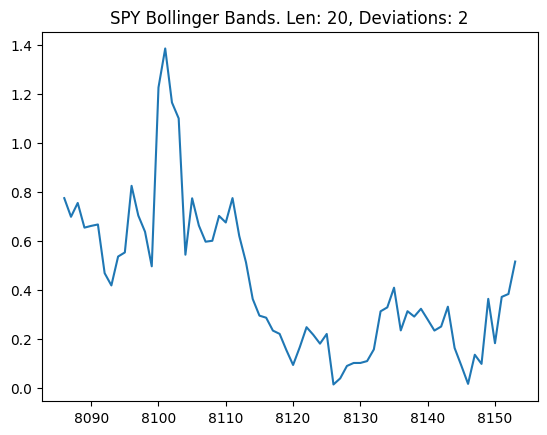

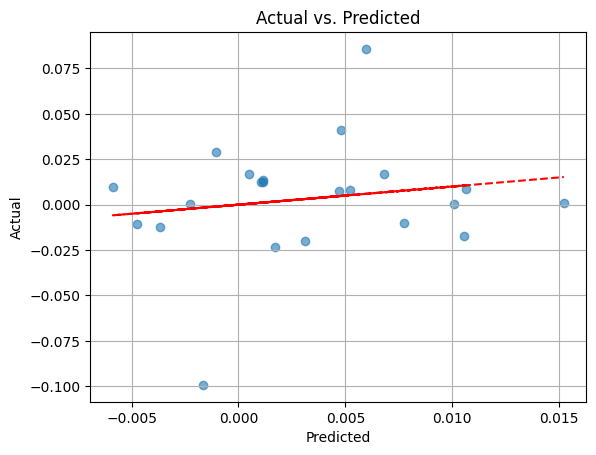

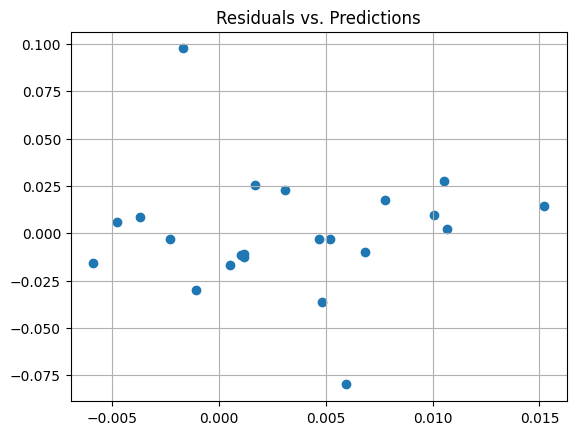

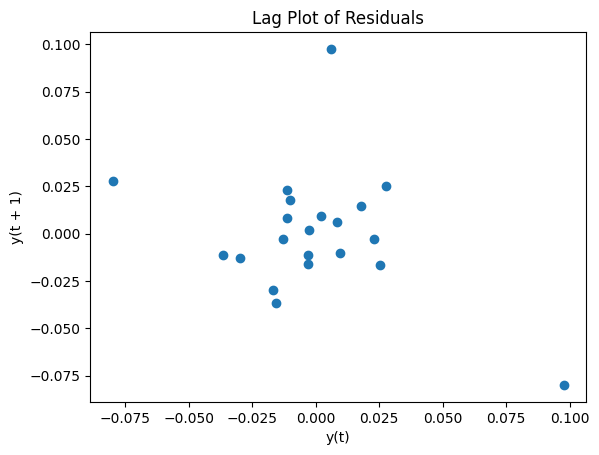

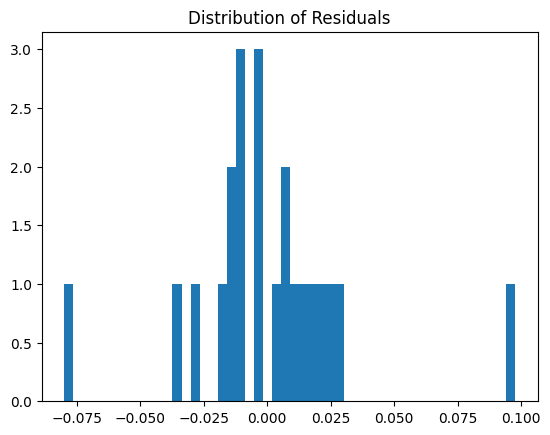

In [ ]:
TICKER = 'SPY'
INTERVAL='1d'

# set period based on interval
if INTERVAL == '1h':
    PERIOD = '730d'
else:
    PERIOD = 'max'

SHIFT = 3
MACD_FAST = 12
MACD_SLOW = 27
MACD_SPAN = 9
BB_LEN = 20
DEVS = 2

# what subsetion of that data are you interested in
LOOKBACK = 100

STRATEGY = ['MACD_hist', 'MFI']

def get_data(ticker=TICKER, lookback=LOOKBACK, interval=INTERVAL):

    # get data at interval you want
    df = yf.download(ticker, interval=interval, auto_adjust=False, period=PERIOD)
    df.columns = df.columns.get_level_values(0)

    # reset the index to make plots prettier
    df = df.reset_index(drop=True)

    # only return the subset of data you are interested in
    return df.iloc[-lookback:, :]

def add_MACD(df, fast=MACD_FAST, slow=MACD_SLOW, span=MACD_SPAN):

    df[f'{fast}_ema'] = df['Close'].ewm(span=fast).mean()
    df[f'{slow}_ema'] = df['Close'].ewm(span=slow).mean()

    # macd line is the difference betweent he fast and slow
    df[f'MACD'] = df[f'{fast}_ema'] - df[f'{slow}_ema']

    # macd signal is a 9-period moving average of this line
    df['Signal'] = df['MACD'].ewm(span=span).mean()

    # MACD histogram is almost always what is used in TA
    df['MACD_hist'] = df['MACD'] - df['Signal']

    # plot the histogram
    plt.figure()
    plt.bar(x=range(len(df)), height=df['MACD_hist'])
    plt.title(f'{MACD_FAST} - {MACD_SLOW} - {MACD_SPAN} MACD Histogram')

    return df

def add_MFI(df, length=14, overbought=80, oversold=20):
    df = df.copy()

    # Step 1: Calculate typical price
    df['Typical_Price'] = (df['High'] + df['Low'] + df['Close']) / 3

    # Step 2: Calculate raw money flow
    df['Raw_Money_Flow'] = df['Typical_Price'] * df['Volume']

    # Step 3: Classify positive/negative money flow
    df['Price_Change'] = df['Typical_Price'].diff()

    df['Pos_Flow'] = np.where(df['Price_Change'] > 0, df['Raw_Money_Flow'], 0)
    df['Neg_Flow'] = np.where(df['Price_Change'] < 0, df['Raw_Money_Flow'], 0)

    # Step 4: Money Flow Ratio and MFI
    pos_sum = df['Pos_Flow'].rolling(window=length).sum()
    neg_sum = df['Neg_Flow'].rolling(window=length).sum()
    mfr = pos_sum / neg_sum
    df['MFI'] = 100 - (100 / (1 + mfr))

    # Step 5: Plot
    plt.figure()
    plt.plot(df['MFI'], label='MFI')
    plt.axhline(overbought, color='red', linestyle='--', label='Overbought')
    plt.axhline(oversold, color='green', linestyle='--', label='Oversold')
    plt.title('Money Flow Index')
    plt.legend()
    plt.show()

    return df.dropna()

def add_BB(df, devs=DEVS, bb_len=BB_LEN):

    # can change to ema (use MACD video/code for reference)
    df['BB_SMA'] = df['Close'].rolling(bb_len).mean()

    # get the standard deviation of the close prices for the period
    df['BB_STD'] = df['Close'].rolling(bb_len).std()

    df['Upper_Band'] = df['BB_SMA'] + (devs * df['BB_STD'])
    df['Lower_Band'] = df['BB_SMA'] - (devs * df['BB_STD'])

    df['BB'] = (df['Upper_Band'] - df['Close']) / (df['Upper_Band'] - df['Lower_Band'])

    df = df.dropna()

    plt.figure()
    plt.plot(df['Close'], color='blue')
    plt.plot(df['Upper_Band'], color='orange')
    plt.plot(df['Lower_Band'], color='orange')
    plt.title(f'{TICKER} Bollinger Bands. Len: {BB_LEN}, Deviations: {DEVS}');

    return df

# define the target variable (also called dependent variable, or y)
def add_target(df, shift=SHIFT):

    # what is the close price SHIFT days from now?
    df[f'Close + {shift}'] = df['Close'].shift(-shift)

    # what is the change in close price SHIFT days from now?
    df[f'{shift} Period % Change'] = (df[f'Close + {shift}'] - df['Close']) / df['Close']

    return df

# this gets rid of autocorrelation when we shift multiple periods
def fix_autocorrelation(df, interval=SHIFT):

    print(len(df))

    df = df.iloc[::interval].reset_index(drop=True)
    print(len(df))
    return df

def generate_regression_output(df, features=STRATEGY, target=f'{SHIFT} Period % Change'):
    subset = df[features + [target]].dropna()

    X = subset[features]
    y = subset[target]

    X_with_const = sm.add_constant(X)
    model = sm.OLS(y, X_with_const).fit()

    intercept = model.params['const']
    coefficients = model.params.drop('const')
    r2 = model.rsquared
    p_values = model.pvalues.drop('const')
    model_p_value = model.f_pvalue  # overall model significance
    n_obs = len(subset)

    y_pred = model.predict(X_with_const)

    # Console summary
    print(model.summary())

    # Plot actual vs predicted
    plt.figure()
    plt.scatter(y_pred, y, alpha=0.6)
    plt.plot(y_pred, y_pred, color='red', linestyle='--')
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.title("Actual vs. Predicted")
    plt.grid(True)

    return df, intercept, coefficients, model_p_value

def validate_regression_output(df, coef, intercept):
    df['Predictions'] = intercept
    for feature in coef.index:
        df['Predictions'] += df[feature] * coef[feature]

    df['Residuals'] = df['Predictions'] - df[f'{SHIFT} Period % Change']

    plt.figure()
    plt.scatter(df['Predictions'], df['Residuals'])
    plt.title('Residuals vs. Predictions')
    plt.grid(True)

    plt.figure()
    lag_plot(df['Residuals'].dropna())
    plt.title('Lag Plot of Residuals')

    plt.figure()
    plt.hist(df['Residuals'].dropna(), bins=50)
    plt.title('Distribution of Residuals')

    return df

def main():
    df = get_data()
    df = add_MACD(df)
    df = add_MFI(df)
    df = add_BB(df)
    df = add_target(df)
    df = fix_autocorrelation(df)
    df, fit_intercept, fit_coefficient, model_pval = generate_regression_output(df)
    df = validate_regression_output(df, coef=fit_coefficient, intercept=fit_intercept)

    print(f"\n[Overall Model Significance] p-value = {model_pval:.6f}")

    return df

df = main()
df